# Machine Learning Interpretability with Python

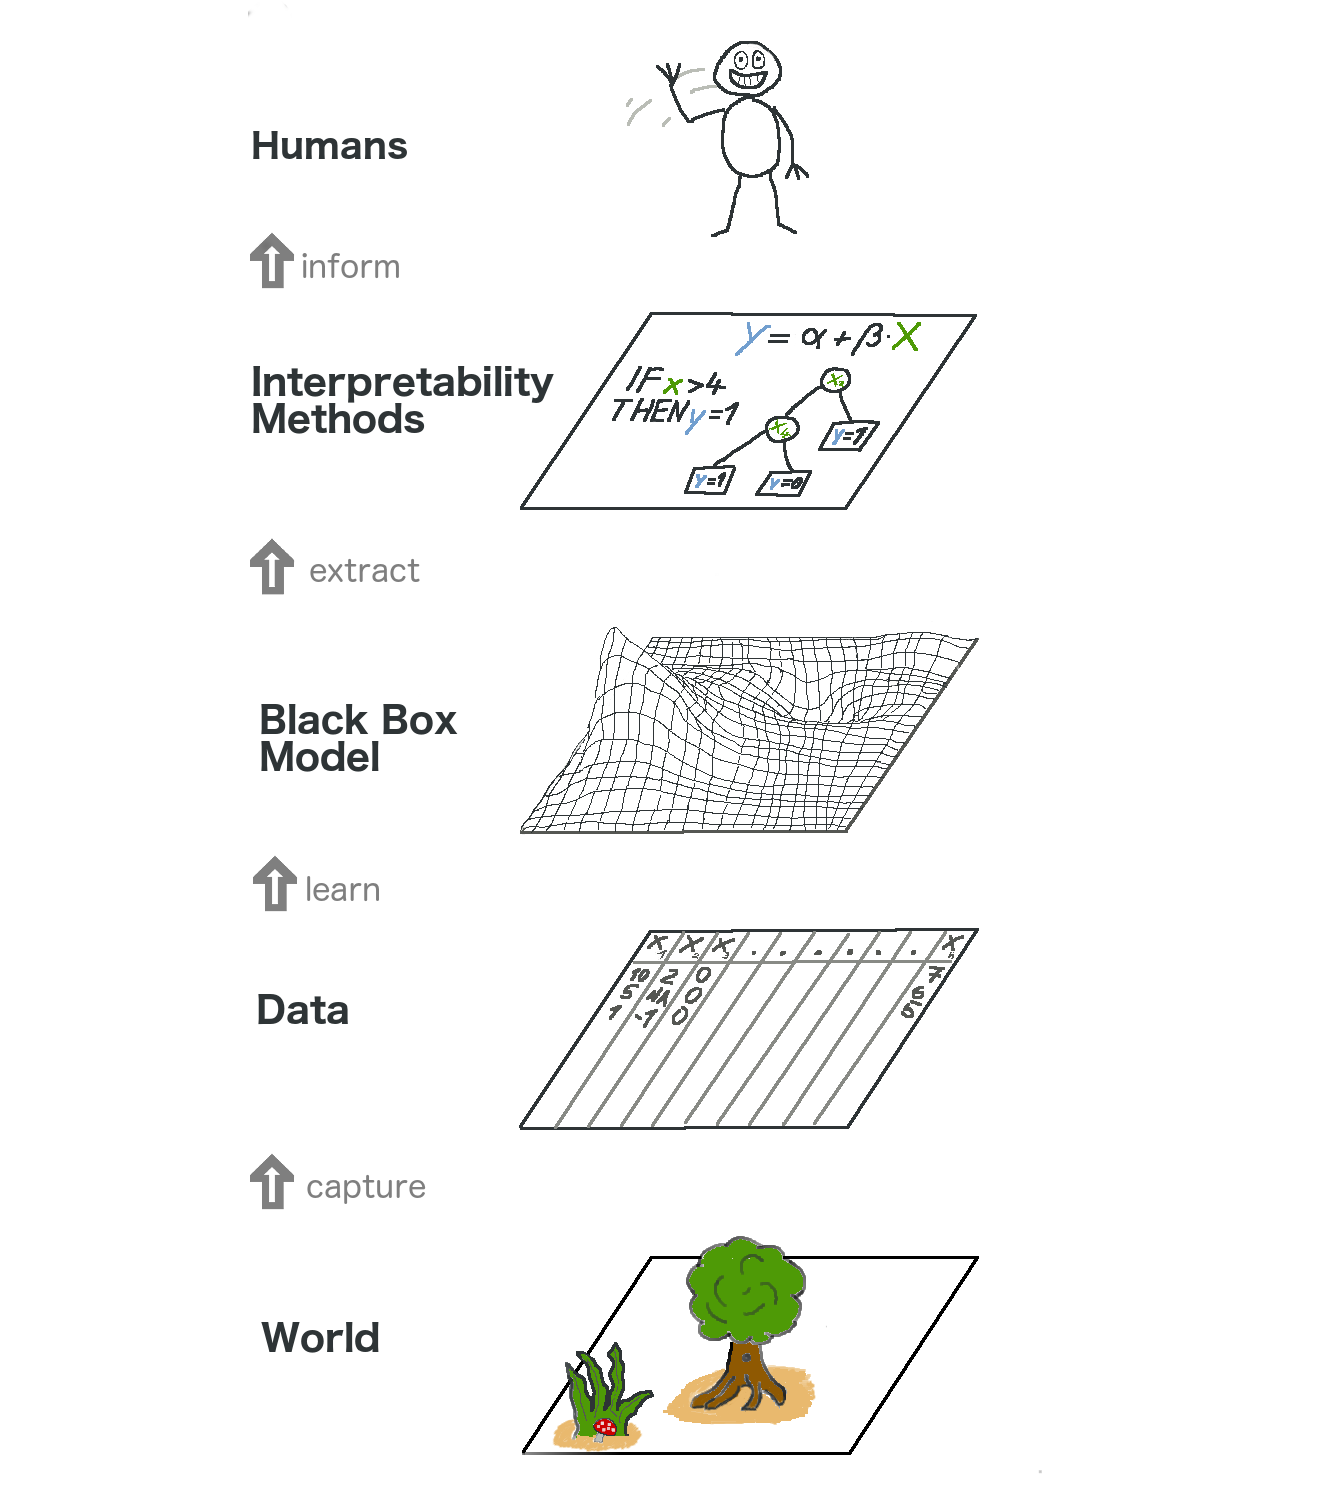

La interpretabilidad del aprendizaje automático es un tema candente y crucial: los algoritmos de aprendizaje automático están por todas partes, son cada vez más omnipresentes, complejos y eficientes, y a veces se tratan como cajas negras. Ya tienen, y tendrán en el futuro, un impacto cada vez mayor en nuestra sociedad y en nuestra vida cotidiana. Como (futuros) Científicos de Datos / Ingenieros de Aprendizaje Automático, incluso si claramente no necesitamos la interpretabilidad todo el tiempo, creo que tenemos un deber ético social y profesional tratando de diseñar modelos tan justos, responsables y transparentes como sea posible. La reciente resolución europea GDRP (Reglamento General de Protección de Datos) atestigua el "derecho a la explicación" de los ciudadanos sobre las decisiones algorítmicas que afectan "significativamente" a cualquier individuo. Además, la interpretación de nuestros procesos de aprendizaje automático podría darnos valiosos conocimientos para :

- depurar
- informar sobre la ingeniería de características
- la comparación de modelos
- impulsar la recopilación de datos en el futuro
- informar sobre la toma de decisiones humanas
- y, en general, para mejorar la comunicación y generar confianza.

### Cargar las bibliotecas

In [1]:
### Elementary my Dear Watson...
import pandas as pd
import numpy as np

### Graphic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

### Some Scikit-learn utils
from sklearn.model_selection import train_test_split

### Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Models
from xgboost import XGBClassifier, plot_importance

########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Some cosmetics add-ons
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

### Load the Red Wine Quality Dataset

In [2]:
# loading the csv dataset in a dataframe
df_raw = pd.read_csv('winequality-red.csv')
df_raw.shape

(1599, 12)

### Descripción de datos

In [3]:
# Comprobemos visualmente las primeras líneas de nuestra colección de vinos
df_raw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# Tipos de datos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Estadísticas descriptivas
df_raw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
wines = df_raw.copy()

### Análisis y visualización de datos

El análisis y la visualización de los datos de exploración son las primeras herramientas para interpretar y obtener conocimientos latentes de los datos. Nos ayudan a identificar las características clave y las representaciones significativas, incluso con grandes conjuntos de datos con, por ejemplo, técnicas de reducción de la dimensionalidad (PCA, t-SNE, etc.). 

Las técnicas de interpretabilidad previas al modelo son independientes del modelo, ya que sólo son aplicables a los propios datos. La interpretabilidad pre-modelo suele producirse antes de la selección del modelo, ya que también es importante explorar y tener una buena comprensión de los datos antes de pensar en el modelo. Las características intuitivas significativas y la escasez (bajo número de características) son algunas propiedades que ayudan a lograr la interpretabilidad de los datos.

Así que ahora vamos a hacer un rápido análisis de datos de exploración para ver cómo se distribuyen y correlacionan los datos.

In [7]:
# Extrayendo nuestra variable objetivo 'quality'
# y creando una lista de características útiles de las variables dependientes
target = 'quality'
features_list = list(wines.columns)
features_list.remove(target)
print(features_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


### Análisis univariante (características y "calidad" del objetivo)

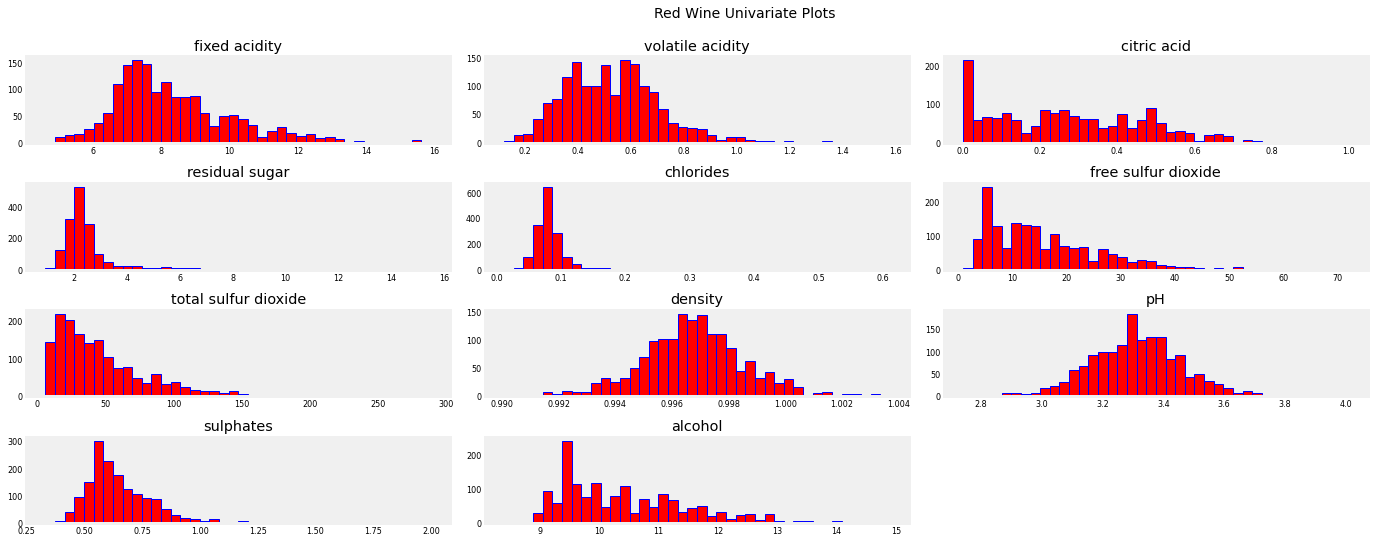

In [8]:
wines[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);  

Podemos observar que algunos rasgos, como el "dióxido de azufre" o los "sulfatos", por ejemplo, tienen una distribución sesgada a la derecha y, en un contexto real, probablemente deberían ser diseñados en sus formas logarítmicas para obtener mejores resultados.

### Target Distribution

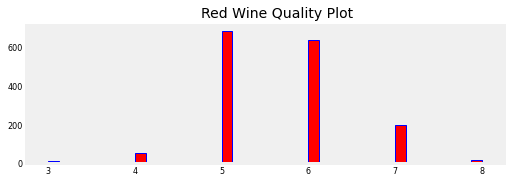

In [9]:
wines[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Quality Plot', x=0.65, y=1.25, fontsize=14);  

### Análisis multivariante

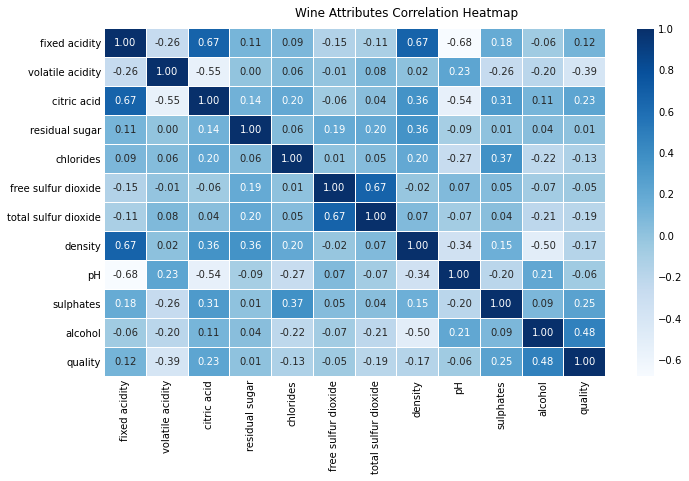

In [10]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Wine Attributes Correlation Heatmap', fontsize=12)

Podemos ver que el nivel de alcohol tiene la mayor correlación positiva (0,48) con la anotación de calidad.

También existe una correlación negativa (cuanto más alta es la acidez del vino, menor es su PH) comprensible entre el "pH" y la "acidez fija" del vino:

- el pH es la medida de la acidez/basicidad con una escala entre 0 (muy ácido) y 14 (muy básico) con una escala intermedia en 7 (neutro)
- la definición de pH es el logaritmo negativo del ion H+ (ion hidrógeno)
- por lo tanto, cuanto más ácida es una solución, cuanto más alta es la concentración de H+, más tiende el pH a 0.
- como se indica en la descripción de los datos, la mayoría de los vinos son ácidos y tienen un pH de 3-4

### Características bivariadas frente al objetivo

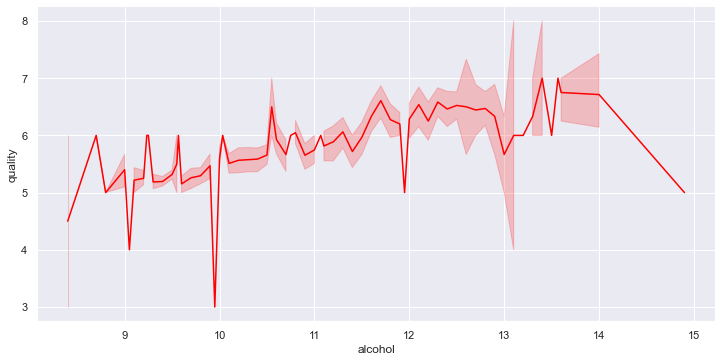

In [11]:
# alcohol vs quality
sns.set()
sns.relplot(data=wines, x='alcohol', y=target, kind='line', height=5, aspect=2, color='red');    

Aquí podemos confirmar visualmente la correlación global positiva observada anteriormente entre el nivel de "alcohol" (< 14) y la puntuación de calidad final. 

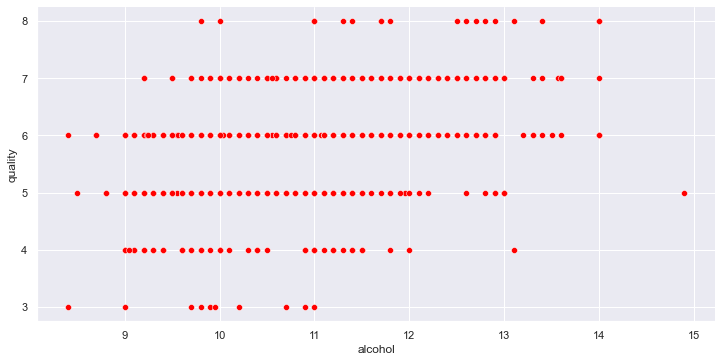

In [12]:
sns.relplot(data=wines, x='alcohol', y=target, kind='scatter', height=5, aspect=2, color='red'); 

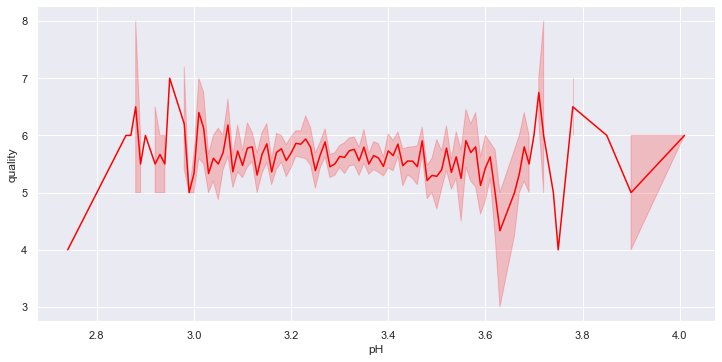

In [13]:
# ph vs quality
sns.set()
sns.relplot(data=wines, x='pH', y=target, kind='line', height=5, aspect=2, color='red');    

### Creación de conjuntos de datos de entrenamiento y prueba

En aras de la simplicidad, transformemos nuestros datos objetivo en un problema de clasificación binaria (vino de calidad "baja" frente a "alta") y construyamos nuestros conjuntos de datos de entrenamiento y prueba en una proporción clásica de 70/30.

In [14]:
# crear nuestro vector objetivo separado, en y tengo los valores de quality y de wines suprimo quality para trabajar con el resto 
y = wines.pop('quality')

# asignar el objetivo a una clase binaria con calidad = 5
y = y.apply(lambda x: 0 if x <= 5 else 1)

# Comprueba rápidamente que tenemos una partición de destino equilibrada
y.sum() / len(y)

0.5347091932457786

In [15]:
# construir conjuntos de datos de entrenamiento/prueba en una proporción de 70/30
X_train, X_test, y_train, y_test = train_test_split(wines, y, test_size=0.3, random_state=33)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

### Entrenando nuestro modelo de clasificación

Ahora vamos a instanciar y a entrenar un modelo de clasificación XGBoost con nuestros datos de entrenamiento

In [16]:
%%time

# ML en dos líneas ;-)
# eval_metric = 'logloss' 
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 99.7 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluación del rendimiento del modelo

Ahora vamos a probar nuestro modelo y a evaluar cómo se ha comportado con sus predicciones con los datos de prueba. No realizaremos aquí ninguna validación cruzada de nuestro modelo, como probablemente se debería hacer en un contexto real.

In [17]:
# Realización de predicciones sobre los datos de las pruebas y evaluación del rendimiento
xgb_predictions = xgb.predict(X_test)

### Evaluación de los resultados

Exactitud, precisión/recuperación, métrica F1 y matriz de confusión

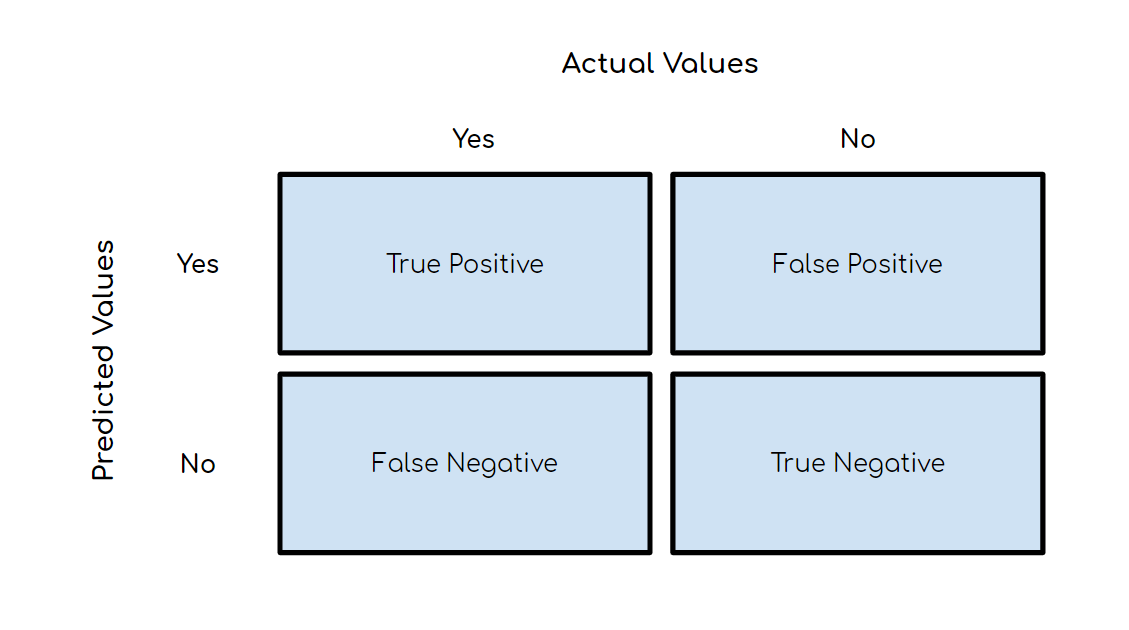

In [18]:
# Diseñamos una función de evaluación de clasificación simple
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
#    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 
    
# https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python

In [19]:
# Evaluamos las predicciones
evaluation_scores(y_test, xgb_predictions, target_names=['Low Quality', 'Hight Quality'])

Precisión: 0.775
------------------------------------------------------------
Informe de clasificación:

                precision    recall  f1-score   support

  Low Quality       0.74      0.78      0.76       221
Hight Quality       0.80      0.77      0.79       259

     accuracy                           0.78       480
    macro avg       0.77      0.78      0.77       480
 weighted avg       0.78      0.78      0.78       480

------------------------------------------------------------
Matriz de confusión:

[[172  49]
 [ 59 200]]


### Clasificación: ROC y AUC

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos
- Tasa de falsos positivos

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419 

La curva AUC / ROC es probablemente una mejor evaluación para esta tarea de clasificación:

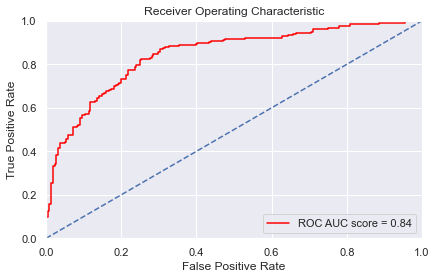

In [20]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. 

Así que : F1 = 0,75 y AUC = 0,84 : bueno, no está mal sin ningún tipo de ajuste o ingeniería de características.

### El compromiso Precisión / Interpretabilidad

En el diseño general del aprendizaje automático, es bien conocido el equilibrio entre el sesgo y la varianza de un modelo, o entre la precisión y la recuperación en los algoritmos de clasificación, por ejemplo.

Del mismo modo, en la interpretabilidad del aprendizaje automático, existe la regla del equilibrio entre precisión e interpretabilidad, que establece que, por lo general, cuanto más preciso es un modelo (o un modelo de modelos, como los conjuntos bagging y boosting), más complejo es y, por tanto, más difícil es interpretar sus resultados.

Además, la precisión no puede bastar para generar confianza en nuestros modelos debido al posible exceso de ajuste del modelo, las correlaciones de las características y el ruido en los datos.

Así que necesitamos métricas y análisis más sofisticados que la simple precisión de los resultados.

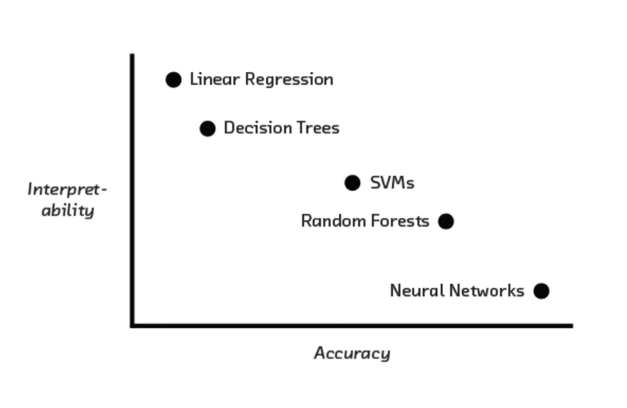

### Métodos de interpretación del modelo por defecto

Los modelos no paramétricos, como los modelos basados en árboles como XGBoost, son más difíciles de interpretar porque su número total de parámetros no es fijo y crecerá con el volumen de datos utilizados para el entrenamiento. Los modelos paramétricos (por ejemplo, la regresión logística) ofrecen, por el contrario, un primer nivel de interpretación a través de sus coeficientes (pero, de hecho, ni siquiera esto es completamente trivial). En ese caso, las técnicas de regularización como L1-regularización/LASSO pueden ser útiles para reducir el espacio de características y mejorar la interpretabilidad del modelo. Para los modelos no paramétricos, afortunadamente, muchos de ellos, como XGBoost, dan acceso a métodos de interpretación como la importancia de las características para ayudarnos a entender la evaluación interna del modelo para hacer sus predicciones.

Para interpretar un modelo, básicamente necesitamos saber

- Qué características son las más importantes en el modelo
- El efecto de cada característica en una predicción concreta
- Los efectos de cada característica en un gran número de predicciones

Los cálculos nativos de la importancia global de las características que vienen con XGBoostare se basan en los siguientes parámetros:

- Peso de las características: se basa en el número de veces que una característica aparece en un árbol en el conjunto de árboles
- Cobertura: la cobertura media (número de muestras afectadas) de las divisiones que utilizan la característica
- Ganancia: la ganancia media de las divisiones que utilizan la característica

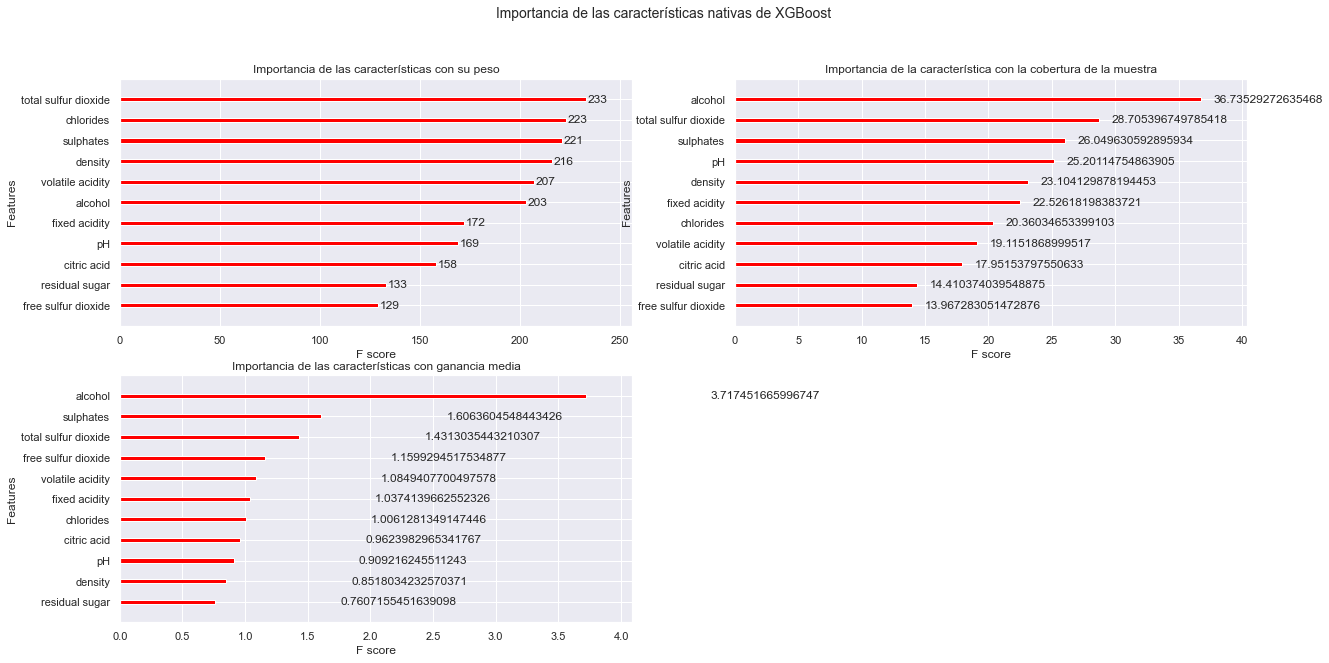

In [21]:
# ploting XGBoost default feature importances
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media");

Como se ve, los rasgos se ordenan de distintas maneras según estos diferentes criterios. Necesitamos una forma más coherente de hacerlo. Como veremos más adelante, los valores de Shapley, por ejemplo, nos ofrecen esa forma consistente.

### ELI5 Model Interpretation

Según su documentación, ELI5 ("Explain Like I'm 5") es una librería de Python que ayuda a depurar clasificadores y regresores de aprendizaje automático y a explicar sus predicciones de forma fácil de entender e intuitiva. ELI5 es un buen punto de partida y soporta modelos basados en árboles y paramétricos/lineales y también utilidades de procesamiento de texto y HashingVectorizer de scikit-learn, pero no soporta verdaderas interpretaciones agnósticas del modelo.

In [20]:
# pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Con XGBoost, ELI5 se limita a utilizar los mismos métodos nativos de cálculo de las importancias de las características (con el parámetro "gain" por defecto) que acabamos de ver anteriormente y nos da una forma fácil y ergonómica de mostrarlo con el método eli5.show_weights.

In [23]:
eli5.show_weights(xgb.get_booster())

#### Explaining Model Prediction Decisions with ELI5

Para que las predicciones de los árboles aleatorios sean más interpretables, cada predicción del modelo puede presentarse como una suma de contribuciones de características (más el sesgo), mostrando cómo las características conducen a una predicción particular. ELI5 lo hace mostrando las ponderaciones de cada característica, indicando su influencia en la decisión final de predicción en todos los árboles. Este es un buen paso en la dirección de la interpretación agnóstica del modelo, pero no totalmente agnóstica del modelo como, lo veremos más adelante, para LIME.

Examinemos las predicciones de puntos de datos individuales, uno para cada clase ("0": vino de calidad con una puntuación <= 5 con una etiqueta de vino de "baja calidad", y "1" con una puntuación > 5 y una etiqueta de "alta calidad") con el método eli5.show_prediction.

In [25]:
# Predicting when a particular wine quality will be <= 5 ('Low Quality')
wine_nb = 0
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', xgb_predictions[wine_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[wine_nb], 
                     feature_names=list(wines.columns), show_feature_values=True)

Reference: 0
Predicted: 0


En esta predicción individual con éxito, las 3 características más influyentes parecen ser el sesgo, el pH, el dióxido de azufre y los cloruros.

In [26]:
# Predicting when a particular wine quality will be > 5 ('Hight Quality')
wine_nb = 4
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', xgb_predictions[wine_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[wine_nb], 
                     feature_names=list(wines.columns), show_feature_values=True)

Reference: 1
Predicted: 1


Y en éste, el sulfato, el dióxido de azufre total y la acidez volátil parecen ser predominantes.

Observa cómo una característica como los "sulfatos" desempeña un papel influyente opuesto en la explicación de la predicción del modelo entre las dos clases y actúa como una bandera en estos dos ejemplos particulares.

#### Importancia de la permutación de características

Eli5 proporciona una forma de calcular la importancia de las características para cualquier estimador de caja negra midiendo cómo disminuye la puntuación cuando una característica no está disponible; el método también se conoce como "importancia de permutación" o "Exactitud de disminución media (MDA)". Esto es más fiable, pero esta técnica es lenta desde el punto de vista informático cuando hay un gran número de características.

Consejo: Como en nuestro caso, si no tiene un conjunto de datos separado, puede ajustar PermutationImportance en los mismos datos utilizados para el entrenamiento; esto todavía permite inspeccionar el modelo, pero no muestra qué características son importantes para la generalización. Así que es mejor que utilice su conjunto de datos de validación, si lo tiene, para calcular la importancia de la permutación de sus características.

In [27]:
%%time

# necesitamos reentrenar un nuevo modelo con arrays
# ya que eli5 tiene un error con Dataframes y XGBoost
# cf. https://github.com/TeamHG-Memex/eli5/pull/261
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

Wall time: 84.7 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)
eli5.show_weights(feat_permut, feature_names = features_list)

Puedes comparar este resultado con la clasificación básica de características (es decir, sin permutación). ¿Cuáles son las diferencias? ¿Qué puede inferir sobre la fiabilidad de estas características?

### Partial Dependence Plots (PD plot)

"El gráfico de dependencia parcial (PD plot) muestra el efecto marginal que tienen una o dos características en el resultado predicho de un modelo de aprendizaje automático (J. H. Friedman 200127). Un gráfico de dependencia parcial puede mostrar si la relación entre el objetivo y una característica es lineal, monótona o más compleja". (de la documentación de PDPbox).

En pocas palabras, mientras que la importancia de las características muestra QUÉ variables afectan más a las predicciones, los gráficos de dependencia parcial muestran CÓMO afecta una característica a las predicciones.

In [38]:
# pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

In [39]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):

    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

Veamos cómo se comporta la característica 'alcohol' (con intervalo de confianza):

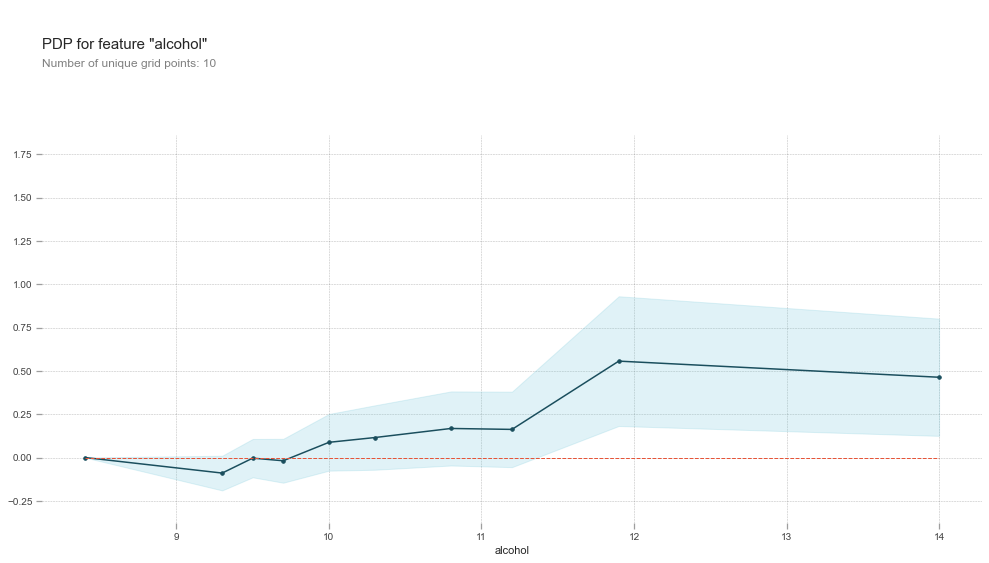

In [40]:
# plot the PD univariate plot
plot_pdp(xgb, X_train, 'alcohol')

Este gráfico PDP nos muestra que el nivel de alcohol parece tener una influencia positiva creciente en la predicción de los vinos de "alta calidad" para los valores entre 9,7 y 11,8. Después de ese umbral, la influencia sigue siendo positiva, pero disminuye progresivamente, y antes era neutra/muy ligeramente negativa.

Explora por ti mismo características importantes como "sulfatos" y "dióxido de azufre total". ¿Qué puedes deducir a priori de su parcela de DP?

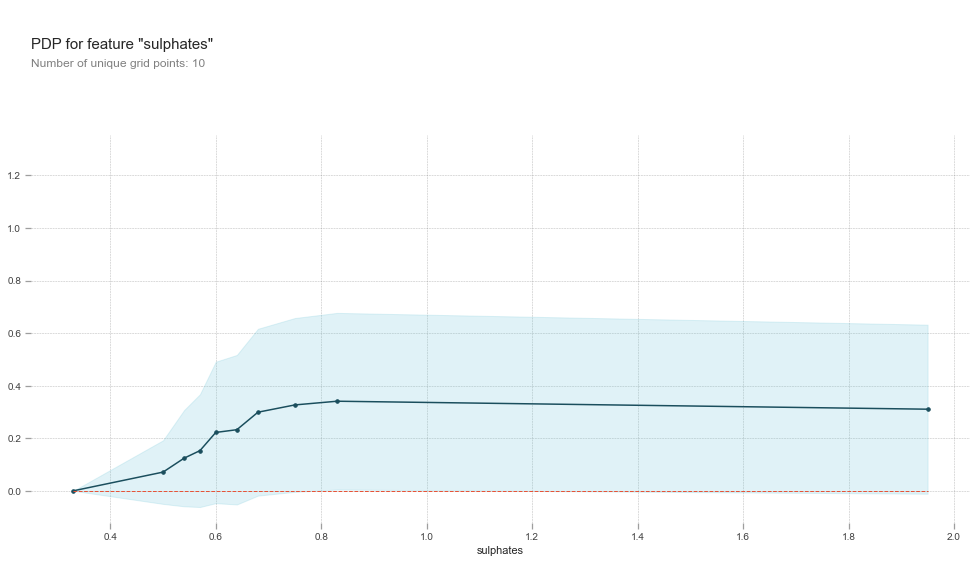

In [41]:
# plot the PD univariate plot
plot_pdp(xgb, X_train, 'sulphates')

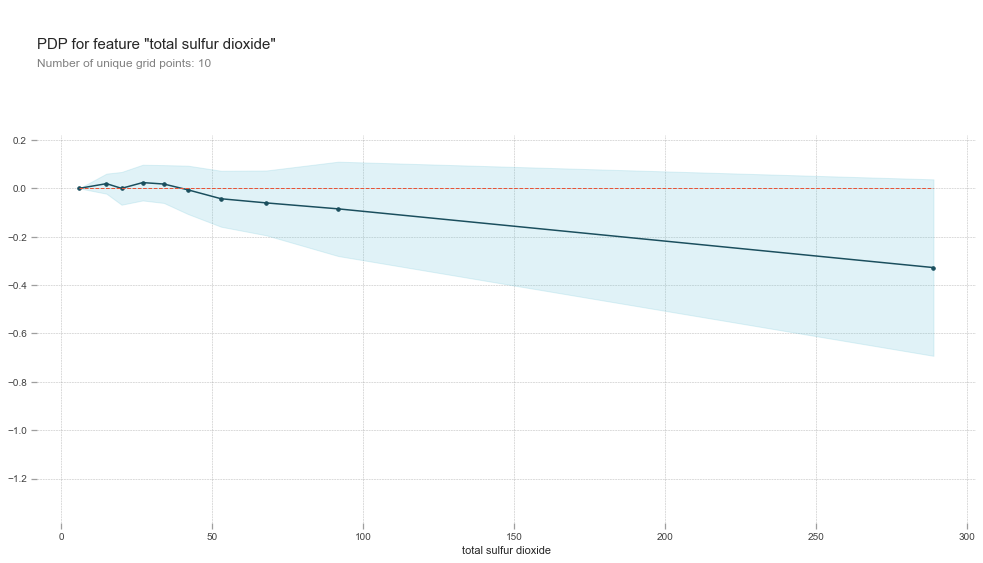

In [42]:
# plot the PD univariate plot
plot_pdp(xgb, X_train, 'total sulfur dioxide')

### Univariate ICE plot

Los gráficos ICE son similares a los gráficos PD, pero ofrecen una visión más detallada sobre el comportamiento de los conglomerados casi similares en torno a la curva media del gráfico PD. El algoritmo ICE ofrece al usuario una visión de las diversas variantes de relaciones condicionales estimadas por la caja negra.

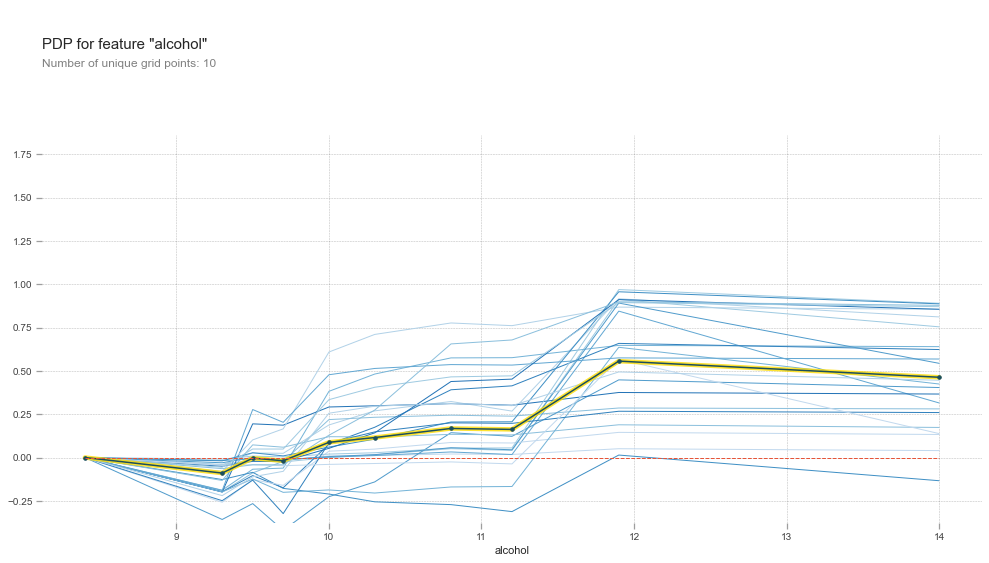

In [43]:
# para el gráfico de ICE debemos especificar el número de clusters de similitud que queremos, 24
plot_pdp(xgb, X_train, 'alcohol', cluster_flag=True, nb_clusters=24, lines_flag=True)

### Bivariate PD plot

Exploremos ahora un gráfico PD bivariante entre 'pH' y la característica 'acidez fija' :

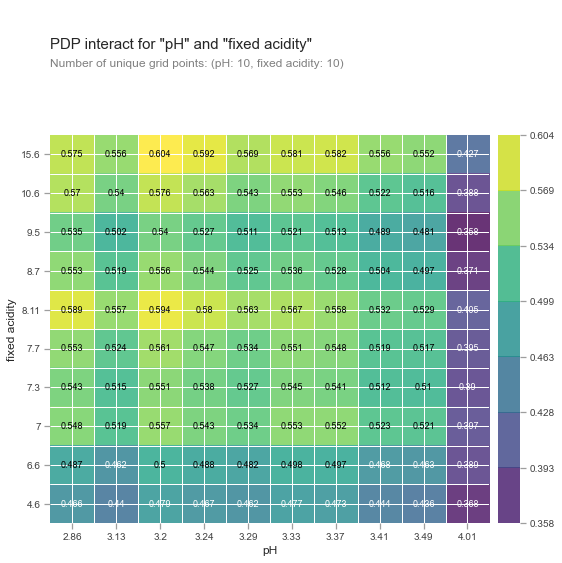

In [44]:
features_to_plot = ['pH', 'fixed acidity']
inter1  =  pdp.pdp_interact(model=xgb, dataset=X_train, model_features=features_list, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')

plt.show()

Para más información: https://towardsdatascience.com/introducing-pdpbox-2aa820afd312

### SKATER Model Interpretation

SKATER es un framework MLI relativamente nuevo y la documentación no es fácilmente accesible por ahora. Esta parte está fuertemente inspirada por este artículo y por un extenso y realmente gran tutorial sobre MLI hecho por Dipanjan Sarkar. 

https://towardsdatascience.com/explainable-artificial-intelligence-part-2-model-interpretation-strategies-75d4afa6b739 

"Skater es un marco unificado para permitir la Interpretación de Modelos para todas las formas de modelos para ayudar a uno a construir un sistema de aprendizaje automático interpretable a menudo necesario para los casos de uso del mundo real utilizando un enfoque agnóstico de modelo. Es una biblioteca de código abierto en python diseñada para desmitificar las estructuras aprendidas de un modelo de caja negra tanto a nivel global (inferencia sobre la base de un conjunto completo de datos) como local (inferencia sobre una predicción individual).

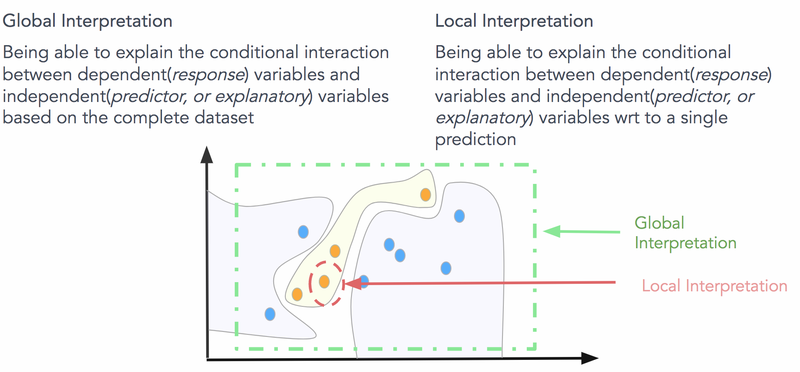

Skater comenzó originalmente como una bifurcación de LIME, pero luego se convirtió en un marco independiente con una amplia variedad de características y capacidades para la interpretación agnóstica de cualquier modelo de caja negra. El proyecto se inició como una idea de investigación para encontrar formas de mejorar la interpretabilidad (preferiblemente humana) de las "cajas negras" predictivas, tanto para los investigadores como para los profesionales".

https://github.com/oracle/Skater

#### Global / Local Interpretations

Los modelos de predicción asignan un espacio de entrada a un espacio de salida. Hay dos tipos de algoritmos de interpretación:

- Algoritmos de interpretación global que ofrecen estadísticas y métricas sobre la distribución conjunta de todo el conjunto de entrenamiento, que generalmente deben reducirse agregando o subconjuntando el espacio de características para que sea "interpretable por el ser humano".
- Algoritmos de interpretación local que sólo se ocupan de regiones del dominio, como la distribución marginal de una característica.

#### Creación de un objeto interpretable

El flujo de trabajo general dentro del paquete skater es crear una interpretación, crear un modelo y ejecutar algoritmos de interpretación. Normalmente, una interpretación consume un conjunto de datos y, opcionalmente, algunos metadatos como nombres de características e ids de filas. Internamente, la Interpretación generará un DataManager para manejar las solicitudes de datos y el muestreo.

- Modelos locales: para crear un modelo skater basado en una función o método local, pase la función de predicción a un InMemoryModel. El usuario puede pasar opcionalmente muestras de datos al argumento de la palabra clave examples. Esto sólo se utiliza para inferir los tipos y formatos de salida. Fuera de la caja, skater permite que los modelos devuelvan arrays numpy y dataframes pandas.

- Modelo operacionalizado: Si su modelo es accesible a través de una API, utilice un DeployedModel, que envuelve la biblioteca de peticiones. Los DeployedModels requieren dos funciones, un formateador de entrada y un formateador de salida, que se comunican con la biblioteca de peticiones para su publicación y análisis. El formateador de entrada toma un DataFrame de pandas o un ndarray de numpy, y devuelve un objeto (como un dict) que puede ser convertido a JSON para ser publicado. El formateador de salida toma un requests.response como entrada y devuelve un numpy ndarray o pandas DataFrame.

In [46]:
# !conda install -c conda-forge Skater -y
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

#### Workflow : Interpretation object > in-memory Model > Interpretation

In [47]:
interpreter = Interpretation(training_data=X_test, feature_names=features_list)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Low Quality', 'Hight Quality'])

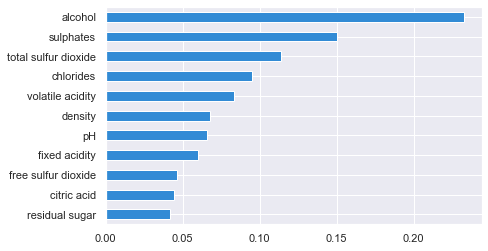

In [48]:
plots = interpreter.feature_importance.plot_feature_importance(im_model, ascending=False, progressbar=False)

#### Partial Dependence plots with SKATER

[46/46] grid cells ████████████████████ Time elapsed: 4 seconds

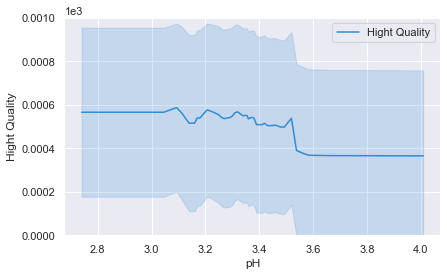

In [50]:
# Los gráficos PD también se pueden generar con la biblioteca SKATER
# Gráfico PD de 'pH' que afecta a la predicción del modelo

r = interpreter.partial_dependence.plot_partial_dependence(['pH'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

Existe una clara brecha para pH = 3,5 +/- 0,1 en relación con el efecto de esta característica en la predicción de la probabilidad de que el vino sea de "Alta Calidad"

##### Bivariate PD Plot showing interactions between features 'pH' and 'fixed acidity' and their effect on the 'quality' classification

[6006/6006] grid cells ████████████████████ Time elapsed: 28 secondsWall time: 30.4 s


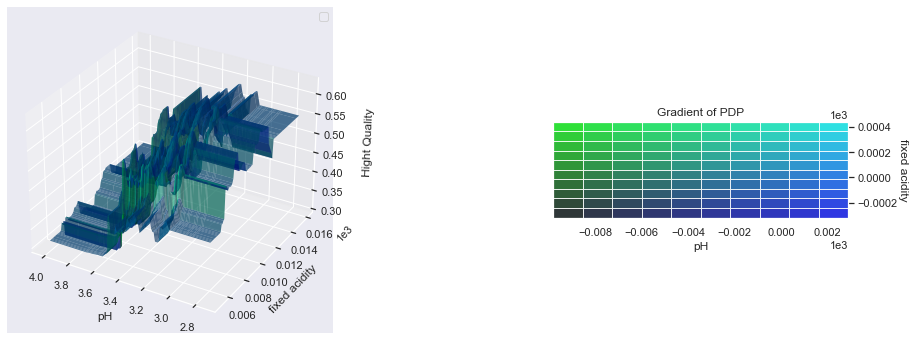

In [39]:
%%time
# beware : this process is computationally slow/heavy

plots_list = interpreter.partial_dependence.plot_partial_dependence([('pH', 'fixed acidity')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

Aquí, si nos fijamos bien, podemos ver de nuevo el mismo efecto, pero esta vez con un efecto inhibidor/negativo adicional (el "cañón" en el centro del subespacio de características) de la acidez fija para valores en torno a 0,012 (NB: el efecto es mucho más visible con una clase de definición única, es decir, target_names, en la llamada InMemoryModel anterior)

### Local Interpretations with Skater

La interpretación local podría lograrse de dos maneras:

En primer lugar, se podría aproximar el comportamiento de un modelo de predicción complejo en las proximidades de una única entrada utilizando un modelo auxiliar o sustituto sencillo e interpretable (por ejemplo, un regresor lineal).
En segundo lugar, se podría utilizar el estimador base para comprender el comportamiento de una sola predicción utilizando funciones intuitivas aproximadas basadas en las entradas y salidas.

#### Local Interpretable Model-Agnostic Explanations (LIME)

LIME es un algoritmo diseñado por Riberio Marco, Singh Sameer, Guestrin Carlos para acceder al comportamiento de cualquier estimador base (modelo) utilizando modelos sustitutos interpretables (por ejemplo, clasificador/regresor lineal).

Esta forma de evaluación global ayuda a generar explicaciones que son localmente fieles pero que pueden no alinearse con el comportamiento global.

Básicamente, las explicaciones LIME se basan en modelos sustitutos locales. Los modelos sustitutos son modelos interpretables (como un modelo lineal o un árbol de decisión) que se aprenden sobre las predicciones del modelo original de caja negra. Pero en lugar de intentar ajustar un modelo sustituto global, LIME se centra en ajustar modelos sustitutos locales para explicar por qué se hicieron predicciones individuales.

A continuación se presenta un flujo de trabajo estándar de alto nivel para esto:

- Elija su instancia de interés para la que desea tener una explicación de las predicciones de su modelo de caja negra.
- Perturbe su conjunto de datos y obtenga las predicciones de la caja negra para estos nuevos puntos.
- Ponderar las nuevas muestras por su proximidad a la instancia de interés.
- Ajuste un modelo ponderado e interpretable (sustituto) en el conjunto de datos con las variaciones.
- Explique la predicción interpretando el modelo local.
- Le recomendamos que lea el capítulo de LIME en el excelente libro de Christoph Molnar sobre Interpretación de Modelos que habla de esto en detalle.

#### Explaining Model Predictions with Skater using LIME

Skater puede aprovechar LIME para explicar las predicciones del modelo. Normalmente, su clase LimeTabularExplainer ayuda a explicar las predicciones sobre datos tabulares (es decir, matriciales). Para las características numéricas, las perturba mediante el muestreo de una Normal(0,1) y la operación inversa de centrado y escalado de la media, según las medias y las estadísticas de los datos de entrenamiento. Para las características categóricas, las perturba mediante el muestreo de acuerdo con la distribución de entrenamiento, y haciendo una característica binaria que es 1 cuando el valor es el mismo que la instancia que se está explicando. La función explain_instance() genera explicaciones para una predicción. En primer lugar, generamos datos de vecindad perturbando aleatoriamente las características de la instancia. A continuación, aprendemos modelos lineales localmente ponderados (sustitutos) sobre estos datos de vecindad para explicar cada una de las clases de forma interpretable.

Dado que XGBoost tiene algunos problemas con el ordenamiento de los nombres de las características cuando se construyen modelos con marcos de datos, utilizaremos nuestro modelo xgb_array, aún ajustado, para que LIME funcione sin problemas adicionales de reordenamiento de características.

In [40]:
predictions = xgb_array.predict_proba(X_test.values)

In [41]:

from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=features_list, discretize_continuous=True, class_names=['Low Quality', 'High Quality'])

##### Predicción cuándo una calidad de vino concreta será <= 5 ("Baja calidad")

In [42]:
wine_nb = 0
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', predictions[wine_nb])
exp.explain_instance(X_test.iloc[wine_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 0
Predicted: [0.9759624  0.02403763]


Podemos ver que este modelo ha tomado esta decisión en particular (82% de probabilidades de que este vino sea calificado como de "Baja Calidad") al plantear las características de "alcohol", "sulfatos" y "acidez volátil", y podríamos saber en qué grado mirando los valores asociados.

##### Predicting when a particular wine quality will be > 5 ('Hight Quality')

In [43]:
wine_nb = 4
print('Reference:', y_test.iloc[wine_nb])
print('Predicted:', predictions[wine_nb])
exp.explain_instance(X_test.iloc[wine_nb].values, xgb_array.predict_proba).show_in_notebook()

Reference: 1
Predicted: [0.10942256 0.89057744]


Podemos ver de nuevo que SKATER LIME ofrece una buena visualización que muestra qué características fueron las más influyentes para que el modelo tomara la decisión correcta de predecir la puntuación de la calidad del vino, aquí para un vino de "Alta Calidad".

#### Model Interpretation with SHAP

SHAP (SHapley Additive exPlanations) es un enfoque unificado para explicar el resultado de cualquier modelo de aprendizaje automático. SHAP conecta la teoría de los juegos con las explicaciones locales, uniendo varios métodos anteriores y representando el único método posible de atribución de características aditivas consistente y localmente preciso, ¡según afirman! (consulte el artículo del NIPS sobre SHAP para obtener más detalles).

http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions

Los valores de SHAP pueden explicar la salida de cualquier modelo de aprendizaje automático, pero para los modelos de conjunto complejos puede ser lento. SHAP tiene implementaciones en c++ que soportan los modelos de árbol *XGBoost*, *LightGBM*, *CatBoost* y *scikit-learn*.

SHAP (SHapley Additive exPlanations) asigna a cada característica un valor de importancia para una predicción concreta. Sus componentes novedosos incluyen: la identificación de una nueva clase de medidas de importancia de características aditivas, y resultados teóricos que muestran que hay una solución única en esta clase con un conjunto de propiedades deseables. Normalmente, los valores SHAP tratan de explicar la salida de un modelo (función) como una suma de los efectos de cada característica que se introduce en una expectativa condicional. En el caso de las funciones no lineales, es importante el orden en el que se introducen las características. Los valores SHAP son el resultado de la media de todos los ordenamientos posibles. Las pruebas de la teoría de juegos demuestran que éste es el único enfoque coherente posible.

Una forma intuitiva de entender el valor Shapley es la siguiente: Los valores de las características entran en una habitación en orden aleatorio. Todos los valores de características de la sala participan en el juego (= contribuyen a la predicción). El valor de Shapley ϕ𝑖𝑗 es la contribución marginal media del valor del rasgo 𝑥𝑖𝑗 uniendo los rasgos que ya han entrado en la sala antes, es decir


$$\phi_{ij}=\sum_{\text{All.orderings}}val(\{\text{features.before.j}\}\cup{}x_{ij})-val(\{\text{features.before.j}\})$$

The following figure from the KDD 18 paper, [_Consistent Individualized Feature Attribution for Tree Ensembles_](https://arxiv.org/pdf/1802.03888.pdf) summarizes this in a nice way!

![](https://i.imgur.com/6Rc1dsa.png)

#### Instalación

In [44]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

#### Explain predictions with SHAP

El valor de Shapley es la contribución media de las características que predicen en diferentes situaciones.

SHAP proporciona múltiples explicadores para diferentes tipos de modelos.

- Explicador de árbol: Soporta modelos XGBoost, LightGBM, CatBoost y scikit-learn mediante Tree SHAP.
- DeepExplainer (DEEP SHAP): Soporta modelos TensorFlow y Keras usando valores DeepLIFT y Shapley.
- GradientExplainer: Soporta modelos TensorFlow y Keras.
- KernelExplainer (Kernel SHAP): Aplicar a cualquier modelo mediante el uso de LIME y los valores de Shapley.

Para más información sobre las explicaciones de los valores de Shapley consulta el capítulo del libro de Christoph Molnar sobre los valores de Shapley https://christophm.github.io/interpretable-ml-book/shapley.html

Así que vamos a jugar con la implementación de Tree SHAP integrada en XGBoost para explicar el conjunto de datos de prueba.

In [45]:
# explicar las predicciones del modelo utilizando los valores SHAP
# (la misma sintaxis funciona para los modelos LightGBM, CatBoost y scikit-learn)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [46]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

0         1         2         3         4         5         6   \
475 -0.213432  0.006549 -0.127058  0.516241  0.012971  0.148191 -5.437983   
476 -0.210939 -0.240796  0.322531 -0.171218 -0.359296 -0.386883  0.259945   
477 -0.142716 -0.085881  0.150186  0.110914  0.522817  0.336243 -0.667627   
478 -0.197178  0.364900 -0.226791 -0.022353  0.417183 -0.287163  0.620674   
479  0.063404  0.287586 -1.199035 -0.388113 -0.835793 -0.038390  0.371963   

           7         8         9         10  
475 -0.371303 -0.481957  0.168878 -0.237916  
476  0.682061 -0.569112  0.285390  1.077097  
477  0.267562 -0.104652  1.072608  4.670026  
478  0.163043 -0.223983 -0.004931  0.188059  
479 -0.115008  0.245580 -1.456865 -1.644589

Obtenemos una matriz de valores SHAP con la misma forma que el conjunto X_test original. Cada fila suma la diferencia entre el resultado del modelo para esa muestra y el valor esperado del resultado del modelo (que se almacena como atributo expected_value del explicador). Normalmente, esta diferencia nos ayuda a explicar por qué el modelo se inclina en la predicción de un resultado de clase específico.

In [47]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  0.15005846


#### Feature Importances with SHAP

Básicamente, se toma la media de las magnitudes de los valores SHAP en el conjunto de datos y se traza como un simple gráfico de barras.

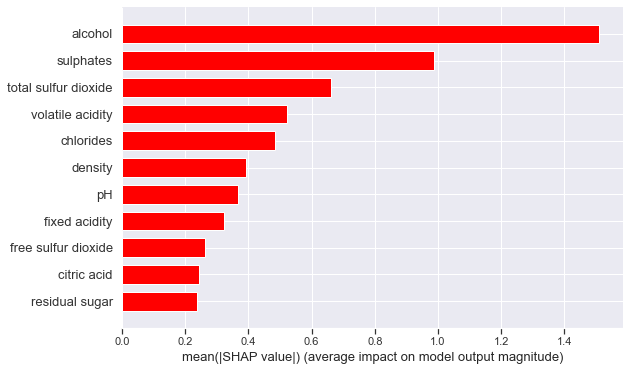

In [48]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

##### Predicting when a particular wine quality will be <= 5 ('Low Quality')

In [49]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Recordatorio: las características que hacen que la predicción sea mayor que el valor base se muestran en rojo, las que hacen que la predicción sea menor se muestran en azul.

SHAP ofrece un buen razonamiento que muestra qué características fueron las más influyentes para que el modelo tomara la decisión correcta de predecir que este vino sería calificado como de "baja calidad". La explicación anterior muestra las características que contribuyen a impulsar el resultado del modelo desde el "valor base" (el resultado medio del modelo sobre el conjunto de datos de entrenamiento que pasamos) hasta el resultado real del modelo.

##### Predicting when a particular wine quality will be > 5 ('Hight Quality')

In [50]:
shap.force_plot(explainer.expected_value, shap_values[4,:], X_test.iloc[4,:])

SHAP puede construir hermosos gráficos interactivos que pueden visualizar y explicar múltiples predicciones a la vez. Aquí visualizamos las decisiones de predicción del modelo para las primeras 1000 muestras de datos de prueba.

In [51]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

Consejo: Fíjese en los menús desplegables de la parte superior del gráfico, con múltiples opciones de visualización y ordenación, y también en el de la izquierda, para aislar y resaltar efectos de características múltiples o individuales.

Se puede interactuar con la visualización anterior de múltiples maneras. La visualización muestra, por ejemplo, algunas decisiones interesantes sobre el patrón de predicción del modelo. Por ejemplo:

- Las primeras 90 muestras de prueba se clasifican probablemente como vinos de "alta calidad" y tienen un alto grado de alcohol (> 11,3) que puede destacarse eligiendo en el menú de la izquierda "efectos del alcohol".
- Si se despliega la función 'alcohol' con el menú desplegable superior, se puede confirmar que el grado de alcohol empieza a desempeñar un papel importante a la hora de hacer subir la predicción a un nivel cercano a 11,3.
- para 'pH', podemos confirmar un cambio de comportamiento del modelo después de 3,5, como se ha visto antes.

¿Qué pasa con los "sulfatos" y el "dióxido de azufre total" que hemos visto antes? ¿Confirma las primeras hipótesis que hiciste con el gráfico de DP?

Creo que estarás de acuerdo en que es definitivamente interesante ver cómo podemos encontrar patrones en las visualizaciones de SHAP que nos llevan a tener una mejor comprensión de por qué el modelo está tomando decisiones específicas y nos ayudan a ser capaces de proporcionar explicaciones para ellos.

#### SHAP Summary Plot

Un valor SHAP para una característica de una predicción específica representa cuánto cambia la predicción del modelo cuando observamos esa característica.

El SHAP también nos permite utilizar un gráfico de dispersión de densidad de los valores SHAP para cada característica para identificar el impacto que tiene cada característica en el resultado del modelo para los individuos del conjunto de datos. Las características se clasifican por la suma de las magnitudes de los valores SHAP en todas las muestras.

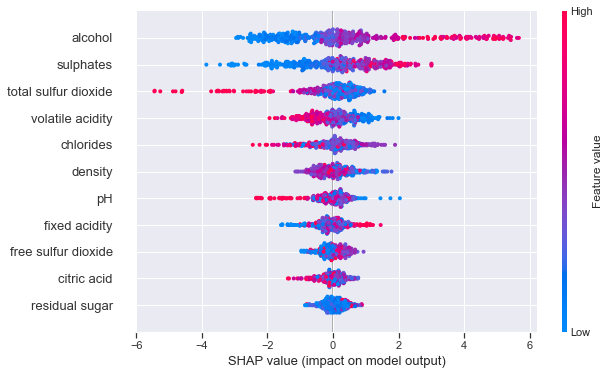

In [52]:
shap.summary_plot(shap_values, X_test)

Observa que cuando los puntos de dispersión no encajan en una línea se amontonan para mostrar la densidad, y el color de cada punto representa el valor de la característica de ese individuo.

Es interesante confirmar de nuevo que los valores elevados de "alcohol" desempeñan un papel importante y positivo en la predicción final, y que los valores elevados de "dióxido de azufre total" parecen tener un impacto negativo en la predicción de los vinos de "alta calidad".

Los gráficos de dependencia de SHAP muestran el efecto de una única (o dos) características en todo el conjunto de datos. Representan el valor de una característica frente al valor SHAP de esa característica en muchas muestras. Los gráficos de dependencia SHAP son similares a los gráficos de dependencia parcial, pero tienen en cuenta los efectos de interacción presentes en las características, y sólo se definen en las regiones del espacio de entrada soportadas por los datos. La dispersión vertical de los valores de SHAP en un solo valor de característica es impulsada por los efectos de interacción, y otra característica puede ser elegida para colorear para resaltar las posibles interacciones.

#### SHAP Dependence Plots

Podemos utilizar el método dependence_plot para trazar el efecto de una característica en la predicción con o sin la influencia de otra característica. Si no da ningún parámetro interaction_index, SHAP decidirá por sí mismo y propondrá automáticamente una característica de interacción.

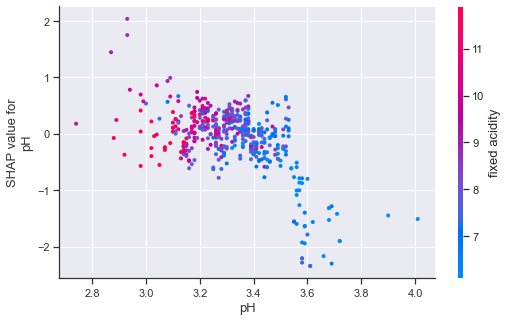

In [53]:
shap.dependence_plot(ind='pH', interaction_index='fixed acidity',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

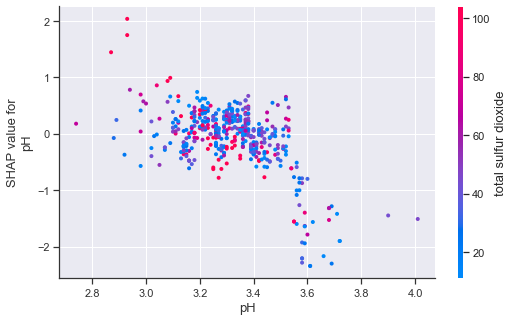

In [54]:
shap.dependence_plot(ind='pH', interaction_index='total sulfur dioxide',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

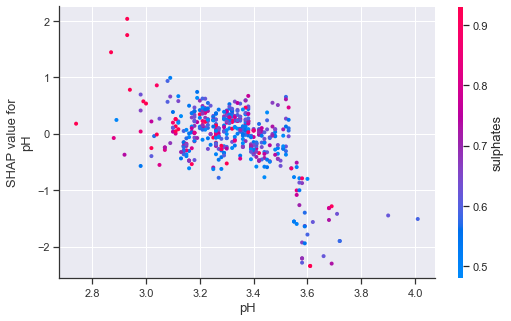

In [55]:
shap.dependence_plot(ind='pH', interaction_index='sulphates',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

### Hands-on FairML (Bonus)

FairML es una nueva biblioteca de Python que audita modelos predictivos de caja negra. La idea básica de FairML (y de muchos otros intentos de auditar o interpretar el comportamiento de los modelos) es medir la dependencia de un modelo de sus entradas cambiándolas. Si un pequeño cambio en una característica de entrada cambia drásticamente la salida, el modelo es sensible a la característica.

¿Pero qué ocurre si los atributos de entrada están correlacionados?

El truco utilizado aquí para contrarrestar esta multicolinealidad es la proyección ortogonal. FairML proyecta ortogonalmente la entrada para medir la dependencia del modelo predictivo de cada atributo. La proyección ortogonal de los vectores es importante porque nos permite eliminar completamente la dependencia lineal entre los atributos. Si dos vectores son ortogonales entre sí, ninguna transformación lineal de un vector puede producir el otro. Esta intuición es la base de la medida de dependencia de las características.

Una ventaja de FairML es que puede auditar cualquier clasificador o regresor. FairML sólo requiere que tenga una función de predicción.

https://github.com/adebayoj/fairml

In [56]:
# pip install https://github.com/adebayoj/fairml/archive/master.zip

from fairml import audit_model
from fairml import plot_dependencies

In [57]:
%%time

xgb_fair = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)

xgb_fair.fit(X_train.values, y_train, eval_metric = 'logloss')

Wall time: 81.8 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=33,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Ahora, importamos los dos métodos clave de fairml. audit_model toma:

- (requerido) la función black-box, que es el modelo a auditar
- (requerido) sample_data para ser perturbado para consultar la función. Tiene que ser un dataframe de pandas sin datos perdidos.

- otros parámetros opcionales que controlan la mecánica del proceso de auditoría, por ejemplo:
    - number_of_runs : número de iteraciones a realizar
    - interacciones : bandera para permitir la comprobación de la dependencia del modelo en las interacciones.

audit_model devuelve un diccionario sobrecargado donde las claves son los nombres de las columnas del dataframe de pandas de entrada y los valores son listas que contienen la dependencia del modelo en esa característica en particular. Estas listas de tamaño number_of_runs.

In [58]:
%%time

# call audit model
feat_importances, _ = audit_model(xgb_fair.predict, X_train, distance_metric='accuracy', direct_input_pertubation_strategy='constant-zero',
                                 number_of_runs=50, include_interactions=True)

# print feature importance
print(feat_importances)

Feature: fixed acidity,	 Importance: 0.4691689008042895
Feature: volatile acidity,	 Importance: -0.5451295799821269
Feature: citric acid,	 Importance: 0.5361930294906166
Feature: residual sugar,	 Importance: -0.5102770330652369
Feature: chlorides,	 Importance: -0.5326184092940125
Feature: free sulfur dioxide,	 Importance: 0.5567470956210903
Feature: total sulfur dioxide,	 Importance: -0.579982126899017
Feature: density,	 Importance: 0.48614834673815904
Feature: pH,	 Importance: -0.4870420017873101
Feature: sulphates,	 Importance: 0.47810545129579984
Feature: alcohol,	 Importance: 0.48168007149240394
Wall time: 876 ms


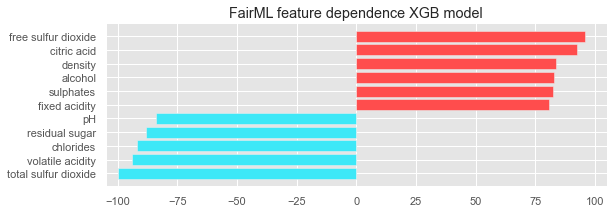

In [59]:
# generate feature dependence plot
fig = plot_dependencies(
    feat_importances.median(),
    reverse_values=False,
    title="FairML feature dependence XGB model",
    fig_size=(8,3)
    )

# Print it in a file
#file_name = "img/fairml_wine_quality.png"
#plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

Consejo obvio: el color rojo indica que el factor contribuye en gran medida a la predicción del modelo (sí, lo sé, "¿y el azul?")

Puedes jugar con los diferentes parámetros como la bandera include_interactions o con direct_input_pertubation_strategy refiriéndose a cómo poner a cero una sola variable con tres opciones diferentes:

'constant-zero': reemplazar con un valor constante aleatorio
'constant-median': reemplaza con un valor constante mediano
'random-sample': reemplaza todos los valores con una permutación aleatoria de la columna
Bien, ¿es FairML en sí mismo realmente "justo"? ¿Qué opinas?